<a href="https://colab.research.google.com/github/Ercampa2/AulasVisaoComputacional/blob/main/Avalia%C3%A7%C3%A3o_Formativa_Coin_Detection_and_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Detecção e Classificação de Moedas

Sua tarefa é criar um algoritmo de visão computacional para detectar e classificar moedas de Real em uma imagem. Ao final o algoritmo deve localizar e determinar o valor da moeda.

Utilize análises de acurácia e matriz de confusão para analisar sua solução.

O uso de mais de um classificador é interessante, e.g, svm e rna.


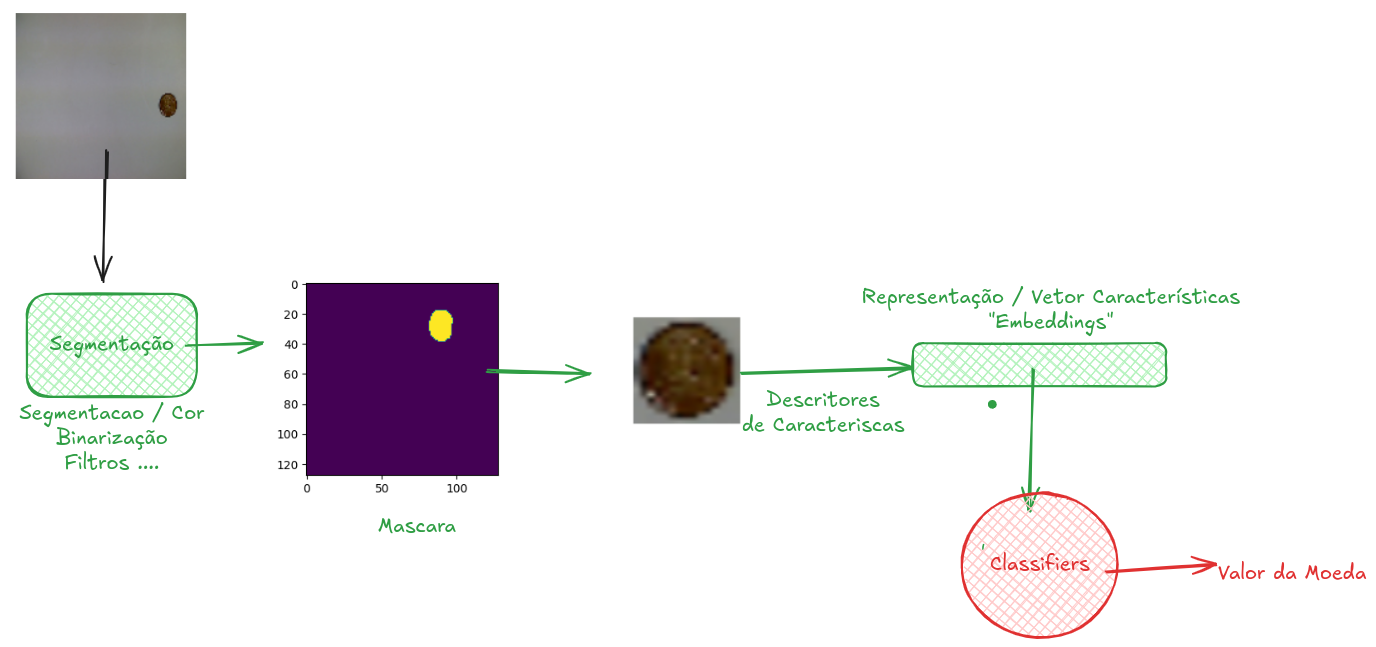

In [1]:
!wget wget https://www.ppgia.pucpr.br/~aghochuli/coins.zip

--2024-09-09 22:24:59--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2024-09-09 22:24:59--  https://www.ppgia.pucpr.br/~aghochuli/coins.zip
Resolving www.ppgia.pucpr.br (www.ppgia.pucpr.br)... 104.18.11.132, 104.18.10.132, 2606:4700::6812:b84, ...
Connecting to www.ppgia.pucpr.br (www.ppgia.pucpr.br)|104.18.11.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65804920 (63M) [application/zip]
Saving to: ‘coins.zip’

coins.zip           100%[===================>]  62.76M   156MB/s    in 0.4s    

2024-09-09 22:24:59 (156 MB/s) - ‘coins.zip’ saved [65804920/65804920]

FINISHED --2024-09-09 22:24:59--
Total wall clock time: 0.7s
Downloaded: 1 files, 63M in 0.4s (156 MB/s)


In [4]:
!unzip -qo coins.zip

In [2]:
import matplotlib.pyplot as plt

def plot_sidebyside(img_list,titles=None,colormap=None,figsize=(12,6)):
  n = len(img_list)
  figure, axis = plt.subplots(1, n, figsize=figsize)

  if titles is None:
    titles = []
    A = ord('A')
    for i in range(n):
      titles.append(chr(A+i))

  for i in range(n):
    axis[i].imshow(img_list[i], cmap=colormap)
    axis[i].set_title(titles[i])
    axis[i].axis('off')
  # Combine all the operations and display
  plt.show()

In [5]:
import os
import numpy as np
import cv2

def load_images_and_labels_from_folder(folder_path):
    images = []
    labels = []

    # Iterate through all files in the folder
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            # Load the image using OpenCV
            img = cv2.imread(file_path)


            # If the image was loaded successfully
            if img is not None:
                img = cv2.resize(img,(128,128))
                img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                # Append the image to the list
                images.append(img)

                # Extract the label from the filename (assuming format 'label_filename.jpg')
                label = filename.split('_')[0]
                labels.append(label)
            else:
                print(f"Warning: Failed to load image {filename}")
        except Exception as e:
            print(f"Error loading {filename}: {e}")

    return np.array(images), np.array(labels)

train_folder = '/content/coins/train'
test_folder = '/content/coins/test'

# Load the data into NumPy arrays
train_data, train_labels = load_images_and_labels_from_folder(train_folder)
test_data, test_labels = load_images_and_labels_from_folder(test_folder)

(1340, 128, 128, 3)
(500, 128, 128, 3)
['5' '50' '5' '25' '50' '10' '5' '25' '100' '50']


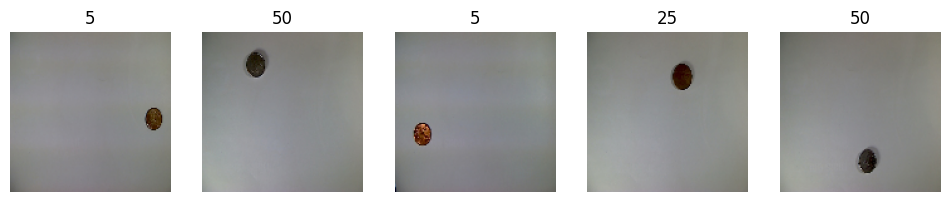

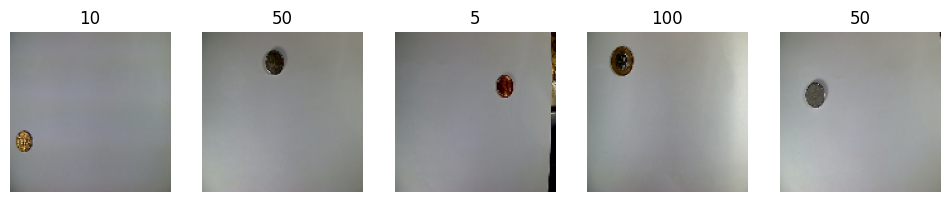

In [6]:
print(train_data.shape)
print(test_data.shape)
print(train_labels[:10])

plot_sidebyside(train_data[:5],train_labels[:5])
plot_sidebyside(test_data[:5],test_labels[:5])

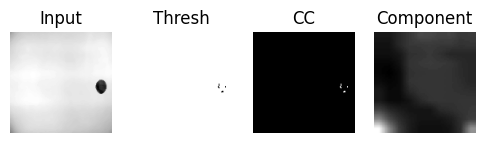

109 66


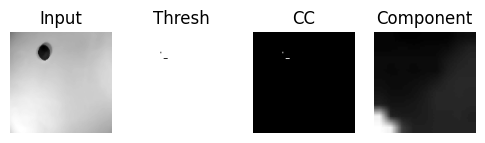

37 26


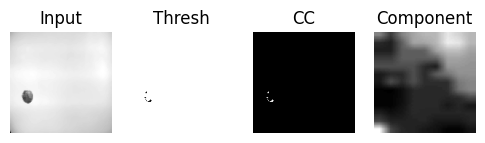

17 76


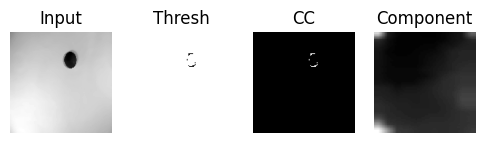

70 28


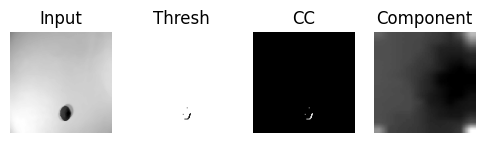

65 96


In [48]:
for img in train_data[:5]:
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  gray = cv2.medianBlur(gray,5)

  blur = cv2.blur(gray, (5, 5))

  #_,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
  thresh = cv2.adaptiveThreshold(blur, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,5, 6)

  connectivity = 8  # You need to choose 4 or 8 for connectivity type
  num_labels, cc_image, stats, centroids = cv2.connectedComponentsWithStats(thresh , connectivity , cv2.CV_32S)

  for i in range(num_labels):
    temp = cc_image.copy()

    temp[cc_image == i] = 255
    temp[cc_image != i] = 0

    x,y,w,h = stats[i][:4]
    area = stats[i][4]
    cx,cy = centroids[i]

    if h > 100 or w > 100:
      continue

    if w / h > 1.5 or w /  h < .5:
      continue

    component = gray[y:y+h, x:x+w]
    component = cv2.resize(component,(64,64))
    plot_sidebyside([gray,thresh,temp,component],['Input','Thresh','CC','Component'],colormap='gray',figsize=(6,6))
    print(x,y)